In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonar-mine-dataset/sonar data.csv


## import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [5]:
# Load the dataset
df = pd.read_csv("/kaggle/input/sonar-mine-dataset/sonar data.csv",header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [6]:
#display dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## display some information about data

In [7]:
# display some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
# display some statistics about data
df.describe().round(1)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,...,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0
mean,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.1,0.2,0.3,0.4,0.4,0.4,0.4,0.5,0.7,0.7,...,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning if there

In [9]:
#display null values
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [10]:
#display duplicated values
df.duplicated().sum()

0

<AxesSubplot:>

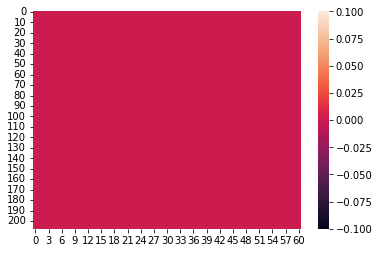

In [11]:
#chart to display null values
sns.heatmap(df.isna())

In [12]:
# gruop data by output
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [14]:
#display shape of data
df.shape

(208, 61)

In [16]:
#mean of output
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## Modeling

### split the data

In [17]:
# split the data
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(columns=60, axis=1)

In [21]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [23]:
y = df[60]

In [24]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [25]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression

In [26]:
# Import the classifier from sklearn
from sklearn.linear_model import LogisticRegression

In [33]:
# build a classifier
model = LogisticRegression()

In [34]:
# Fit the model.
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Make predictions.
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [36]:
# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))

Accuracy score:  0.7857142857142857


# naive_bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
# build a classifier
naive_bayes = MultinomialNB()

# Fit the model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

Accuracy score:  0.8333333333333334


# Support Victor Machine

In [39]:
from sklearn.svm import SVC

In [40]:
# build a classifier
model = SVC()

# Fit the model.
model.fit(X_train, y_train)
# Make predictions. 
y_pred = model.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))

Accuracy score:  0.8333333333333334


# Decision Tree

In [41]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# build a classifier
model = DecisionTreeClassifier()

# Fit the model.
model.fit(X_train, y_train)

# Make predictions. 
y_test_pred = model.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred)))

Accuracy score:  0.6428571428571429


In [44]:
# build a classifier
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=10)

# Fit the model.
model.fit(X_train, y_train)

# Make predictions.
y_test_pred = model.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred)))

Accuracy score:  0.7619047619047619


# Ensemble Methods

In [45]:
# Import the classifier from sklearn
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [46]:
# build a Bagging classifier 
bag_mod = BaggingClassifier(n_estimators=200)

# build a Random Forest classifier 
rf_mod = RandomForestClassifier(n_estimators=200)

# build a AdaBoost classifier 
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

In [47]:
# Fit your BaggingClassifier to the training data
bag_mod.fit(X_train, y_train)

# Fit your RandomForestClassifier to the training data
rf_mod.fit(X_train, y_train)

# Fit your AdaBoostClassifier to the training data
ada_mod.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=300)

In [48]:
# Predict using BaggingClassifier on the test data
bag_preds = bag_mod.predict(X_test) 

# Predict using RandomForestClassifier on the test data
rf_preds = rf_mod.predict(X_test)

# Predict using AdaBoostClassifier on the test data
ada_preds = ada_mod.predict(X_test)

In [49]:
print('Accuracy score: for BaggingClassifier ', format(accuracy_score(y_test, bag_preds)))

print('Accuracy score: for RandomForestClassifier ', format(accuracy_score(y_test, rf_preds)))

print('Accuracy score: for AdaBoostClassifier ', format(accuracy_score(y_test, ada_preds)))

Accuracy score: for BaggingClassifier  0.8095238095238095
Accuracy score: for RandomForestClassifier  0.8571428571428571
Accuracy score: for AdaBoostClassifier  0.8571428571428571


# Grid Search

In [50]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [54]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [6, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

print('Accuracy score: for RandomForestClassifier ', format(accuracy_score(y_test, rf_preds)))

Accuracy score: for RandomForestClassifier  0.8333333333333334


In [53]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
param_dist = {"n_estimators": [10, 50, 100, 200],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

print('Accuracy score: for AdaBoostClassifier ', format(accuracy_score(y_test, rf_preds)))

Accuracy score: for AdaBoostClassifier  0.7857142857142857
